# Clustering-3: DBSCAN

## import Modules

In [1]:
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

## Generate Data

We randomly generate 3 clusters (each with 50 points).

(150, 2)


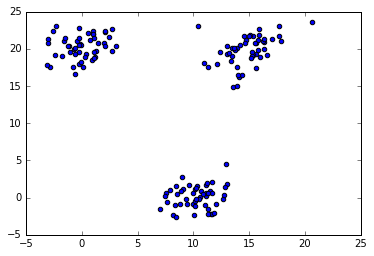

In [2]:
np.random.seed(42)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 3]], size=[50,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 3]], size=[50,])
c = np.random.multivariate_normal([15, 20], [[3, 1], [1, 3]], size=[50,])
X = np.concatenate((a, b, c),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

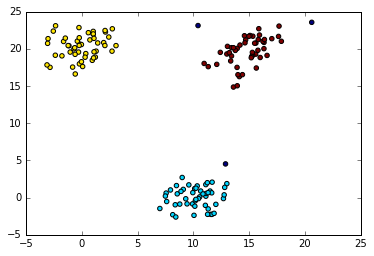

In [3]:
dbscan = DBSCAN(eps=2, min_samples=3)
label_dbscan = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=label_dbscan)

In [4]:
print(label_dbscan)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2]


Note the three outliers (dark blue points in the figure, and -1 in the array).

Let's see what will happen if we slightly increase ```eps```

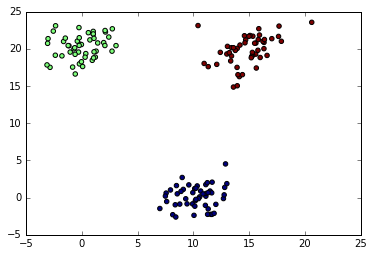

In [5]:
dbscan = DBSCAN(eps=5, min_samples=3)
label_dbscan = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=label_dbscan)

## Affect of ```eps```

In [6]:
def dbscan(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    label_dbscan = dbscan.fit_predict(X)
    plt.scatter(X[:,0], X[:,1], c=label_dbscan)
    print(label_dbscan)

A too small ```eps``` will bring too many clusters and outliers, leads to bad clustering result.

[ 0 -1  0 -1  1  0  2 -1  3 -1 -1 -1  0  3  0 -1 -1 -1  2  3 -1  0 -1 -1  2
  0  1 -1  0  4  0 -1 -1  4  0 -1 -1 -1  0  2 -1 -1  0 -1  1  4  0 -1 -1  0
 -1 -1  5 -1 -1 -1 -1  5  8 -1  6 -1 -1 -1 -1 -1  7 -1 -1  6 -1 -1 -1 -1 -1
 -1 -1 -1 -1  7  7 -1 -1 -1 -1 -1  5 -1 -1 -1  6  7  5 -1 -1  5  8 -1 -1  8
  9 -1 -1  9 -1  9 10 -1 11 -1 -1 -1 12 -1 12 11 13 -1 -1 12 11  9 -1 -1 -1
 -1 -1 -1 -1  9 11 -1 -1 14 -1 14 -1 -1 13 13 -1 14 -1 -1 13 -1 12 13 10 10]


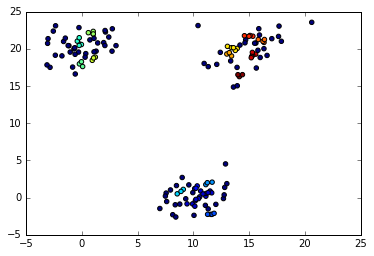

In [7]:
dbscan(0.5, 3)

A too large eps tends to cluster all the points in one cluster.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


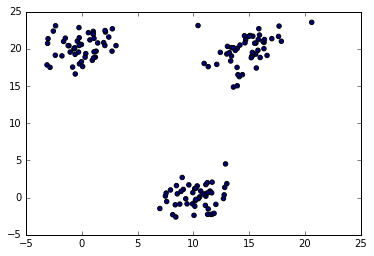

In [8]:
dbscan(20, 3)

## Exercise: Investigate the Affect of ```min_samples```

Now you can try by yourself with different values of ```eps``` and ```min_samples```, to see how they affect the results/quality of DBSCAN.